# Programming for Chemistry 2025/2026 @ UniMI

![logo](fun_with_flags.png "Logo")

## Lecture 10: Computer graphics with a class

In this lecture I hope you will acquire a new skill, that is to be able to read and understand the code written by someone else. For this purpose, navigate the files included in this lecture folder.

Take some time (10-15 minutes) to inspect the `canvas.py` source code and it's documentation `canvas_documentation.pdf`.

## 1. Inspect a Python class
After a class definition or after a method/function definition, you can type a description of the class/method as a string value. This string is called **doc-string** and it will be revealed by the Python `help()` function. Advanced editor such as *VSCode* will display a pop-up with the documentation of the class/method to help you coding. 

In [1]:
from canvas import Canvas

In [2]:
#help(Canvas)
help(Canvas.circle)

Help on function circle in module canvas:

circle(self, x, y, r)
    Draw a circle centered at the specified point.
    
    Args:
        x (int): Center x-coordinate
        y (int): Center y-coordinate
        r (int): Radius in pixels
        
    Returns:
        Canvas: This Canvas instance for method chaining



Of course this is true if the programmes has written a **doc-string** for each class and method.

If this is not the case, you have to fish out the information yourself. Luckily Python provides the function `dir(classname)` that return the list of attributes and method of a class (**introspection**). Of course, you must read their source code. To locate the filename and line number, print the `__code__` attribute of function/method.

In [3]:
print(dir(Canvas))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'circle', 'ellipse', 'fill', 'get_height', 'get_width', 'line', 'lines', 'point', 'polygon', 'rectangle', 'set_fillcolor', 'set_font', 'set_pencolor', 'set_penwidth', 'show', 'text', 'tofile']


In [ ]:
for x in dir(Canvas):
    if not x.startswith('__'):
        print('the class Canvas has method:', x)

In [4]:
print(Canvas.lines.__code__)

<code object lines at 0x7f7d445489c0, file "/home/ceresoli/2025-Programming/lec10/canvas.py", line 254>


### Excercise 1: Draw some flags, including the one of your country if not too complicated
Create a canvas 300px wide and 200px pixel high. The cartesian coordinates are such that (0,0) is the top left corner and (300,200) is the bottom right corner. Do also the EU flag using `math.cos` and `math.sin`.

Hint, use Canvas.show() as the last line of the cell, to display the image in the notebook. 

In [6]:
#!pip install pillow

In [7]:
from canvas import Canvas

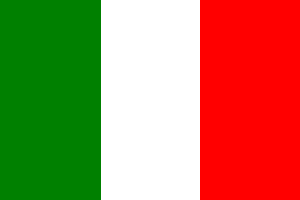

In [8]:
# Italy
W, H = 300, 200
c = Canvas(W, H, color='white')
c.set_pencolor('green').set_fillcolor('green')
c.rectangle(0, 0, W/3, H)
c.set_pencolor('red').set_fillcolor('red')
c.rectangle(2*W/3, 0, W, H)
c.show()

In [ ]:
# UK
W, H = 300, 200
...

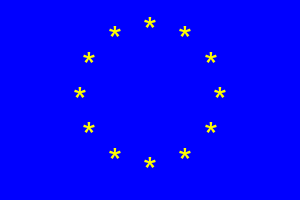

In [13]:
# EU
import math

W, H = 300, 200
c = Canvas(W, H, color='blue')
c.set_font("arial", 36)
radius = 70
for i in range(12):
    angle = math.radians(i*30)
    c.set_pencolor("yellow")
    #c.circle(W/2 + radius*math.cos(angle), H/2 + radius*math.sin(angle), 10)
    c.text(W/2 + radius*math.cos(angle), H/2 + radius*math.sin(angle), '*', center=True)
    
c.show()

## 2. An improved `Canvas` class
For a better EU flag one should draw a true five-corner star, instead of printing a `*`. Let's add methods to draw more complex shapes, i.e. regular polygons, stars, etc..

### Exercise: Use **inheritance** and create a `CanvasPlus` class.
Add methods to draw polygons and stars with given the center, the radius, the number of sides and an optional initial rotation.

In [22]:
class CanvasPlus(Canvas):
    """A canvas class with more geometrical shapes"""
    # note that if we not define the __init__ method, the CanvasPlus class will inherit is from Canvas
    
    def regular_polygon(self, x0, y0, r, nsides=5, rot=0):
        """Draw a regular polygon at (x0,y0) with radius r, nsides sides, and rotation rot (in degrees)"""
        points = []
        
        for i in range(nsides):
            angle = math.radians(i*360/nsides + rot)
            x = x0 + r*math.cos(angle)
            y = y0 + r*math.sin(angle)
            points.append( (x,y) )
        
        super().polygon(points)


    def star(self, x0, y0, r, nsides=5, rot=0):
        """Draw a regular star at (x0,y0) with radius r, nsides sides, and rotation rot (in degrees)"""
        
        points = []
        
        for i in range(nsides):
            angle = math.radians(i*360/nsides + rot)
            x = x0 + r*math.cos(angle)
            y = y0 + r*math.sin(angle)
            points.append( (x,y) )
        
            angle = math.radians((i+0.5)*360/nsides + rot)
            x = x0 + 0.5*r*math.cos(angle)
            y = y0 + 0.5*r*math.sin(angle)
            points.append( (x,y) )
            
        super().polygon(points)

        pass

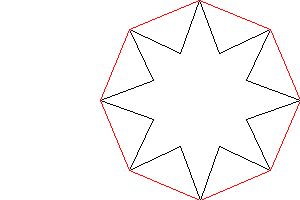

In [24]:

W, H = 300, 200
c = CanvasPlus(W, H, color='white')
c.star(200, 100, 100, 8)
c.set_pencolor('red').regular_polygon(200, 100, 100, 8)
c.show()

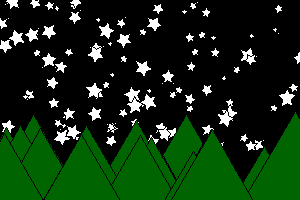

In [26]:
import random

W, H = 300, 200
c = CanvasPlus(W, H, color='black')

# stars
for i in range(100):
    x = random.randint(0,W)
    y = random.randint(0,H-50)
    r = random.randint(4,10)
    rot = random.randint(0,360)

    c.set_pencolor('black')
    c.set_fillcolor('white')
    c.star(x, y, r, nsides=5, rot=rot)

# mountains
for i in range(20):
    x = random.randint(0,W)
    y = random.randint(H-20,H)
    r = random.randint(40,80)

    c.set_pencolor('black')
    c.set_fillcolor('darkgreen')
    c.regular_polygon(x, y, r, nsides=3, rot=30)
    
c.show()

## 3. Turtle graphics
**Turtle graphics** is an alternative way of drawing, instead of using cartesian coordinates. The idea is that
you attach a pencil to a turtle and tell the turtle to step forward, backward and to turn left or right.
Initially the turtle is in the center of the canvas and its heading is towards the right (angle=0°).

### Exercise: use aggregation to create a `Turtle` class that takes an `Canvas` and draws on it
The class will have the follwing attributes:
* `self.canvas`, `self.x`, `self.y`, `self.heading`, `self.isdrawing`

Implement the following methods:
* `__init__(canvas, pencolor)`, `penup()`, `pendown()`, `left(angle)`, `right(angle)`, `forward(steps)`, `backward(steps)`
* `moveto(x,y)`, `position()` => return x, y, `set_heading(angle)`, `get_heading(angle)`

In [27]:
class Turtle:
    def __init__(self, canvas, pencolor='black'):
        self.canvas = canvas
        self.pencolor = pencolor
        self.x = canvas.get_width()//2
        self.y = canvas.get_height()//2
        self.heading = 0
        self.isdrawing = True
        
    def penup(self):
        self.isdrawing = False
        
    def pendown(self):
        self.isdrawing = True
        
    def moveto(self, x, y):
        self.x = x
        self.y = y
    
    def position(self):
        return self.x, self.y
    
    def get_heading(self):
        return self.heading
    
    def set_heading(self, heading):
        self.heading = heading % 360
        
    def left(self, angle):
        self.heading += angle
        
    def right(self, angle):
        self.heading -= angle
        
    def forward(self, steps):
        theta = math.radians(self.heading)
        dx = int(steps * math.cos(theta))
        dy =-int(steps * math.sin(theta))
        if self.isdrawing:
            self.canvas.set_pencolor(self.pencolor)
            self.canvas.line(self.x, self.y, self.x+dx, self.y+dy)
        self.x += dx
        self.y += dy
        
    def backward(self, steps):
        self.forward(-steps)
        


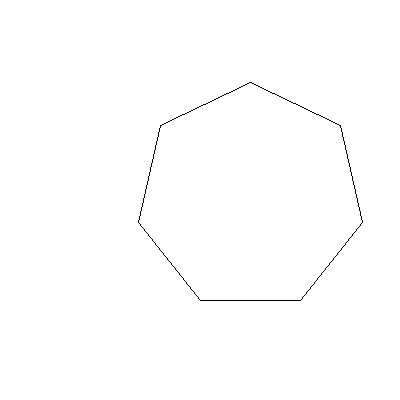

In [28]:
# example: draw a polygon
c = Canvas(400, 400, color='white')
t = Turtle(c)

nsides = 7
t.moveto(200,300)
for i in range(nsides):
    t.forward(100)
    t.left(360/nsides)

c.show()

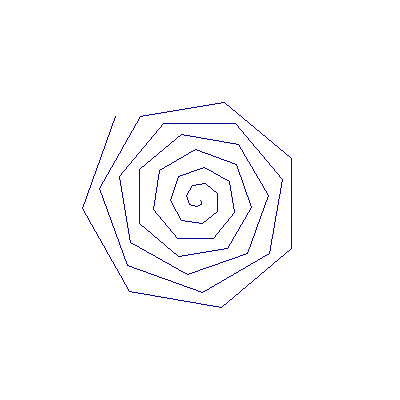

In [29]:
# example: draw a spiral
c = Canvas(400, 400, color='white')
t = Turtle(c, pencolor='darkblue')

for i in range(50):
    t.forward(i*2)
    t.right(50)

c.show()

The combination of **recursive functions** and **turtle graphics**, gives beautiful fractals. The first example
is the Koch curve, illustrated here:

In [31]:
def koch(turtle, length, level):
    assert level >= 0
    
    if level == 0:
        # draw the segment and exit from recursion
        turtle.forward(length)
        return
    
    # divide each segment into four segments 1/3 shorter
    newlen = length/3.0
    koch(turtle, newlen, level-1)
    turtle.left(60)
    koch(turtle, newlen, level-1)
    turtle.right(120)
    koch(turtle, newlen, level-1)
    turtle.left(60)
    koch(turtle, newlen, level-1)

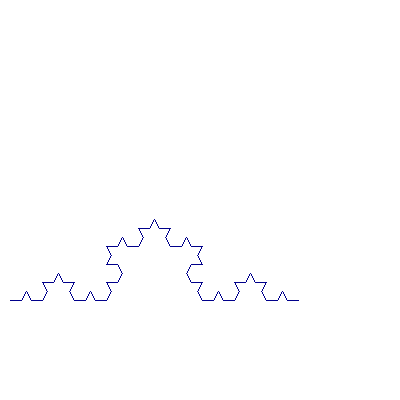

In [34]:
c = Canvas(400, 400, color='white')
t = Turtle(c, pencolor='darkblue')
t.moveto(10, 300)
koch(t, 300, level=3)
c.show()

### Exercise: draw a tree recursively
Modify the function above to draw a tree. Here are the intructions:
* we draw a branch with `t.forward(length)` followed by `t.backward(length)`
* we turn right by 25°
* we draw a smaller tree (recursive call)
* we turn left by (25 + 35)°
* we draw another smaller tree (recursive call)
* we turn right by 35°
* we do `t.penup()`, `t.backward(length)` then `t.pendown()` (i.e. we go back without drawing the line)

In [ ]:
def tree(turtle, length, level):
   ...
    

In [ ]:
c = Canvas(400, 400, color='white')
t = Turtle(c, pencolor='maroon')
t.moveto(200, 390)
t.set_heading(90)

tree(t, 100, level=4)
c.show()